### Crossover

basic algorthim utilises single point cross over, but a more complex method of optimisation may result in better results - such as two point mutation


documentation:
- https://brandinho.github.io/genetic-algorithm/

reference:
An improvement of the standard genetic algorithm fighting premature.pdf
- https://d1wqtxts1xzle7.cloudfront.net/66873909/s0965-9978_2800_2900070-320210504-27511-15fgwap-with-cover-page-v2.pdf?Expires=1642252007&Signature=TYuG0TiTElnnPjU3vWnQU2djgqkyYYvH8rJAbngjfG5-KqQiv6rRunk-4HW-CRNPSblO19DbB77kaEdJDrgTuRWQh~HRiVUYm4UVmMTCthI87eUBkPrKHTYjJFvix71Q~i1o4A0AAKBNZaxCHE4HJKUs6v2uHuA3W-Y2vD9ADhn4Af4Mtqb0qSAlrTS6XmnqeVLeio0RFqcgLdQExVHjBs4m5OyyEtiwi1TipyQbd~lkF67apzA6FnEAeaf1FmU6PrqMZX5wYkZbiFM6dsBXRYQpZe36Bb5xB4pkmauXHqyhtFnrBYP6-HA3nOERhsAHMtByzvn9hzZOoEYZK4GIDg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA


In [1]:
from BasicGaAlgorithim import (
                                generate_population,
                                fitness_function,
                                selection,
                                # crossover,
                                mutation,
                                check_for_perfect_genotype,
                                calculate_perfect_score
                            )


In [3]:
import random

from OptimiseGaAlgorithim import (
                                crossover
)

population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")


crossover(selected_parents, 3)

selected parents
[([2, 1, 1], [0, 0, 1]), ([0, 0, 1], [2, 1, 1]), ([2, 1, 1], [0, 0, 1])]
offspring


[[2, 0, 1], [0, 1, 1], [0, 0, 1]]

In [4]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


([[1, 0, 0], [2, 2, 0], [1, 0, 1]], [0.0, 1.0, 0.0])

In [8]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 6.263337500000489,
 'number_of_generations': 3291,
 'completed_state': [5, 2, 4, 6, 0, 3, 1, 7]}

In [5]:
# run algo on all test populations

import pickle

test_populations_name = 'test_populations_25'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

results

elapsed_time:
1.064013100000011
number_of_generations:
1131
completed_state:
[2, 7, 3, 6, 0, 5, 1, 4]
elapsed_time:
4.906617799999992
number_of_generations:
4715
completed_state:
[3, 7, 0, 2, 5, 1, 6, 4]
elapsed_time:
0.8232512000000156
number_of_generations:
870
completed_state:
[5, 2, 4, 6, 0, 3, 1, 7]
elapsed_time:
3.1433894000000464
number_of_generations:
3524
completed_state:
[1, 3, 5, 7, 2, 0, 6, 4]
elapsed_time:
1.6387394999999856
number_of_generations:
1780
completed_state:
[2, 5, 3, 0, 7, 4, 6, 1]
elapsed_time:
6.703244200000029
number_of_generations:
6611
completed_state:
[3, 7, 4, 2, 0, 6, 1, 5]
elapsed_time:
2.488045800000009
number_of_generations:
2370
completed_state:
[2, 5, 3, 0, 7, 4, 6, 1]
elapsed_time:
0.1486666999999784
number_of_generations:
180
completed_state:
[2, 5, 7, 0, 4, 6, 1, 3]
elapsed_time:
1.9018113999999855
number_of_generations:
1862
completed_state:
[0, 6, 4, 7, 1, 3, 5, 2]
elapsed_time:
5.315521699999977
number_of_generations:
4885
completed_state:
[2

{'elapsed_time': [1.064013100000011,
  4.906617799999992,
  0.8232512000000156,
  3.1433894000000464,
  1.6387394999999856,
  6.703244200000029,
  2.488045800000009,
  0.1486666999999784,
  1.9018113999999855,
  5.315521699999977,
  3.8667911000000004,
  1.1793718000000126,
  8.074209600000017,
  4.4873794999999745,
  7.684413399999983,
  0.489788400000009,
  10.004422300000044,
  3.1795730999999705,
  6.8660571000000346,
  19.069275000000005,
  3.9905881999999906,
  13.038065899999992,
  7.949408500000004,
  5.021053400000028,
  3.3588391000000115,
  8.475938700000029,
  7.27837059999996,
  0.9096018000000186,
  1.4260834000000386,
  3.8036595000000375,
  0.5148740999999859,
  8.114186599999982,
  3.16265089999996,
  1.3920755000000327,
  0.2810579000000075,
  0.336739399999999,
  5.504067399999997,
  0.9082682000000091,
  6.16046080000001,
  10.51923800000003,
  2.127578999999969,
  4.680023699999936,
  2.0622363999999607,
  1.0036767999999938,
  1.2240310000000818,
  6.3192678000000

In [10]:
for completed_state in results["completed_state"]:

    if fitness_function(completed_state) < 28:
        print(completed_state)


    elapsed_time  number_of_generations           completed_state
0       1.064013                   1131  [2, 7, 3, 6, 0, 5, 1, 4]
1       4.906618                   4715  [3, 7, 0, 2, 5, 1, 6, 4]
2       0.823251                    870  [5, 2, 4, 6, 0, 3, 1, 7]
3       3.143389                   3524  [1, 3, 5, 7, 2, 0, 6, 4]
4       1.638739                   1780  [2, 5, 3, 0, 7, 4, 6, 1]
..           ...                    ...                       ...
95      2.770398                   1760  [3, 1, 6, 4, 0, 7, 5, 2]
96     11.156923                   4554  [1, 4, 6, 0, 2, 7, 5, 3]
97      0.021818                      8  [4, 0, 7, 3, 1, 6, 2, 5]
98      8.894029                   5655  [1, 4, 6, 3, 0, 7, 5, 2]
99     11.406747                   6663  [5, 2, 0, 6, 4, 7, 1, 3]

[100 rows x 3 columns]
mean_number_of_generations: 4503.0
std_number_of_generations: 3917.8823155352484
mean_elapsed_time: 5.422506022000001
std_elapsed_time: 5.144770719829255
over_30_seconds
Empty DataFram

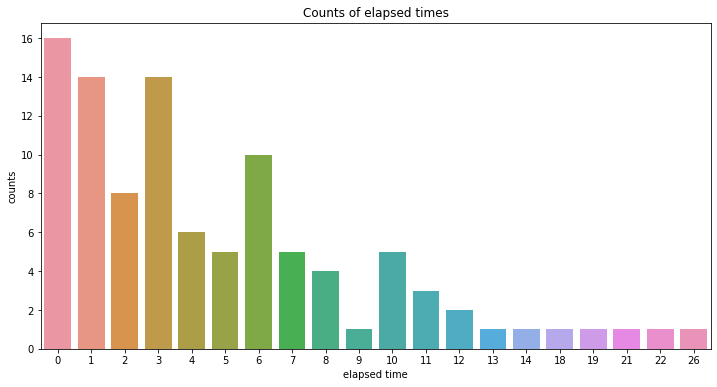

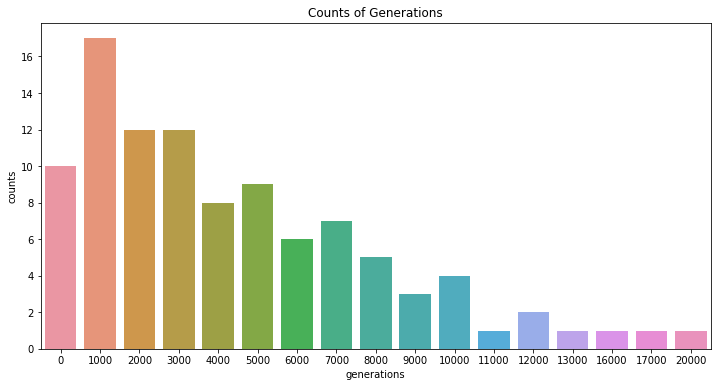

In [11]:
import os

unique_identifier = "100_25_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\optimise-crossover"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)
